# Application of computer Vision: Understand Unsupervised learning auto-encoders with MNIST digit dataset.
### Table of interest:
1. Introduction
2. Import all required Library
3. Data Exploration and visualization.
4. Data preprocessing.
5. Building of our Auto-encoder.
6. Model trainning and predict.
7. Model evaluation.


## Introduction.
Let's start by understanding the operation of an auto-encoder.

* Autoencoders are a class of neural network that attempt to recreate the input as its target using backpropagation. An autoencoder consists of two parts, an encoder and a decoder. The encoder will read the input and compress it to a compact representation, and the decoder will read the compact representation and recreate the input from it. In other words, the autoencoder tries to learn the identity function by minimizing the reconstruction error.

* The number of hidden units in the autoencoder is typically less than the number of input (and output) units. This forces the encoder to learn a compressed representation of the input which the decoder reconstructs. If there is structure in the input data in the form of correlations between input features, then the autoencoder will discover some of these correlations, and end up learning a low dimensional representation of the data similar to that learned using principal component analysis (**PCA**).

* The encoder and decoder components of an autoencoder can be implemented using either dense, convolutional, or recurrent networks, depending on the kind of data that is being modeled.

* Autoencoders can also be stacked by successively stacking encoders that compress their input to smaller and smaller representations, and stacking decoders in the opposite sequence. Stacked autoencoders have greater expressive power and the successive layers of representations capture a hierarchical grouping of the input, similar to the convolution and pooling operations in convolutional neural networks.

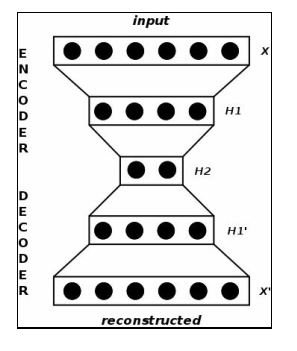

* For example in the network shown above, we would first train layer **X** to reconstruct layer **X'** using the hidden layer **H1** (**ignoring H2**). We would then train the layer **H1** to reconstruct layer **H1'** using the hidden layer **H2**. Finally, we would stack all the layers together in the configuration shown and fine tune it to reconstruct **X'** from **X**. With better activation and regularization functions nowadays, however, it is quite common to train these networks in totality.

Now let's apply this principe of operation to our famous MNIST digit dataset.

## 2. Import all required Library

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## 3. Data Exploration and visualization.

In [2]:
#Load our MNIST dataset.
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))


11493376/11490434 [==============================] - 1s 0us/step
XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Now let's visualize the distribution of our data by classes.

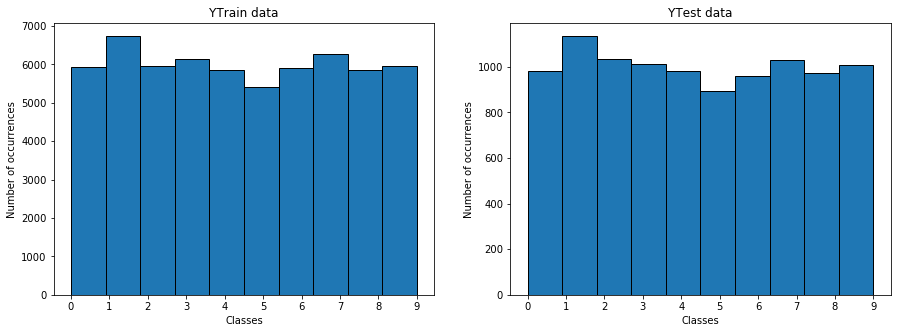

In [3]:
# we plot an histogram distribution of our test and train data.
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].hist(YTrain, ec='black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes') 
axs[0].set_ylabel('Number of occurrences')
axs[1].hist(YTest, ec='black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes') 
axs[1].set_ylabel('Number of occurrences')
# We want to show all ticks...
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))

plt.show()


## 4. Data preprocessing.
We don't need more preprocessing here because we are in unsupervised learning. Just normalise and reshapping our data. We don't need the target data.

In [4]:
# Data normalization.
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)


(60000, 784)
(10000, 784)


## 5. Building of our Auto-encoder.
Our model has only one hidden(**encoded layer**) layer with 32 units neurons. The input and output layer(**decoded layer**) have each 784 units neurons.

In [5]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## 6. Model trainning and predict.

In [6]:
# Let's train the model using adadelta optimizer
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))
# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.3555 - val_loss: 0.2720
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2653 - val_loss: 0.2554
Epoch 3/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2467 - val_loss: 0.2360
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2283 - val_loss: 0.2188
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2134 - val_loss: 0.2062
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2023 - val_loss: 0.1964
Epoch 7/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1930 - val_loss: 0.1875
Epoch 8/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1852 - val_loss: 0.1805
Epoch 9/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1788 - val_loss: 0.1

## 7. Model evaluation.
The `fit()` method on a Keras Model returns a `History` object. The `History.history` attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
For our model we don't have metrics values because we didn't specify metrics when we compiled the model.

dict_keys(['val_loss', 'loss'])


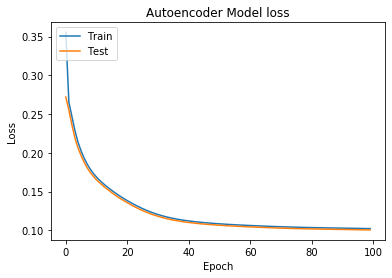

In [7]:
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

### Visualization of the results.
Now let's visualize for 5 images decoded by our model.

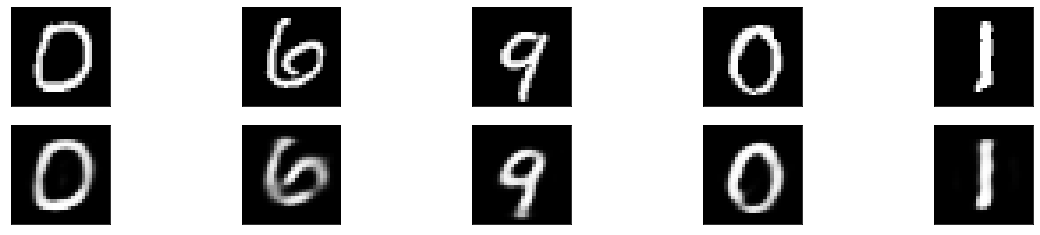

In [8]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

***Please give an up-vote if you have found this kernel helpful. It will ke me motivate to do more.***

Thanks